In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [151]:
# 1. 데이터 로드 및 전처리
# wisdm 데이터셋을 불러옵니다.

names = ["num", "user_id", "activity", "timestamp", "x_axis", "y_axis", "z_axis"]
cols_to_keep = ["user_id", "activity", "x_axis", "y_axis", "z_axis"]

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/기계학습/11주차 강의/WISDM.csv', header=None, names=names, usecols=cols_to_keep)

In [152]:
df

,user_id,activity,x_axis,y_axis,z_axis
0,33,Jogging,-0.694638,12.680544,0.503953
1,33,Jogging,5.012288,11.264028,0.953424
2,33,Jogging,4.903325,10.882658,-0.081722
3,33,Jogging,-0.612916,18.496431,3.023717
4,33,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...,...
1048570,7,Standing,-7.930000,5.430000,-0.990000
1048571,7,Standing,-7.970000,5.130000,-1.140000
1048572,7,Standing,-7.970000,5.220000,-1.380000
1048573,7,Standing,-7.930000,5.600000,-1.180000


In [153]:
# 형태 확인
df.shape

(1048575, 5)

In [154]:
# 결측치 확인
df.isnull().values.any()

np.False_

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user_id   1048575 non-null  int64  
 1   activity  1048575 non-null  object 
 2   x_axis    1048575 non-null  float64
 3   y_axis    1048575 non-null  float64
 4   z_axis    1048575 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 40.0+ MB


<Axes: xlabel='activity', ylabel='count'>

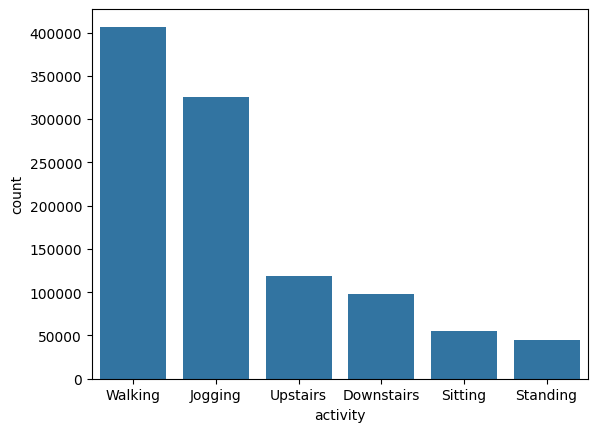

<Axes: xlabel='activity', ylabel='count'>

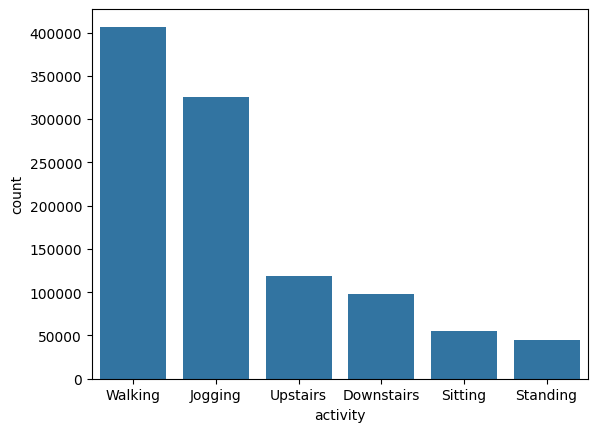

In [155]:
import seaborn as sns

sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)

/tmp/ipython-input-3870980742.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],
/tmp/ipython-input-3870980742.py:1: UserWarning: 
The palette list has fewer values (1) than needed (35) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],


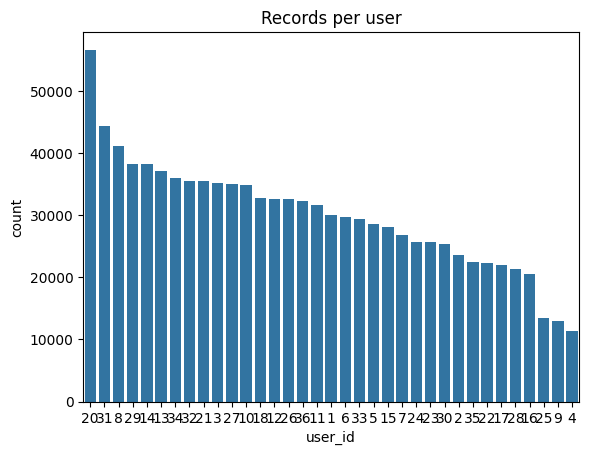

/tmp/ipython-input-3870980742.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],
/tmp/ipython-input-3870980742.py:1: UserWarning: 
The palette list has fewer values (1) than needed (35) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],


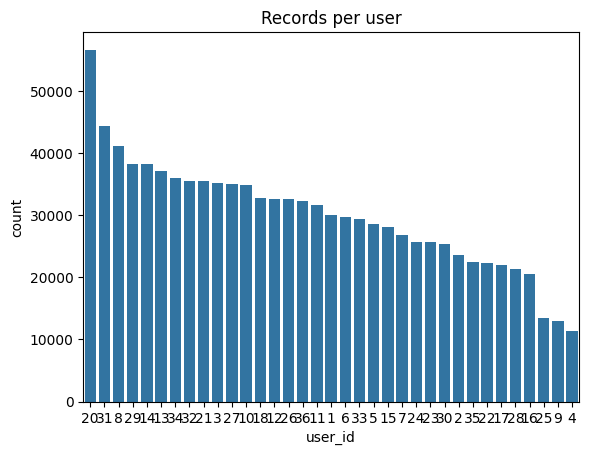

In [156]:
sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],
              order = df.user_id.value_counts().index)
plt.title("Records per user");

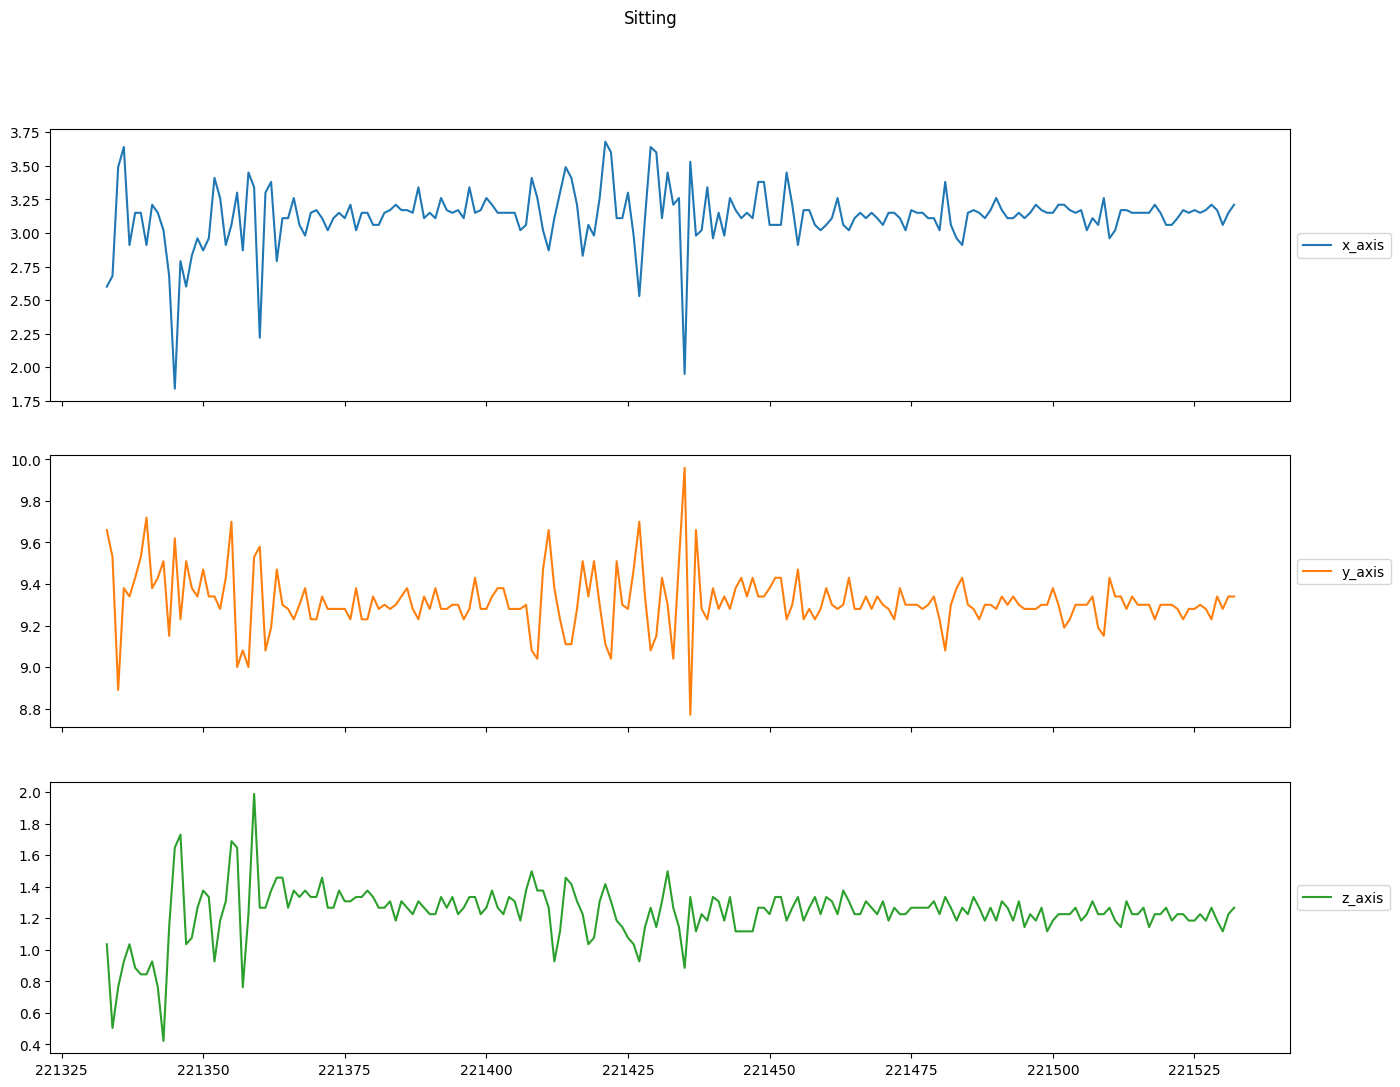

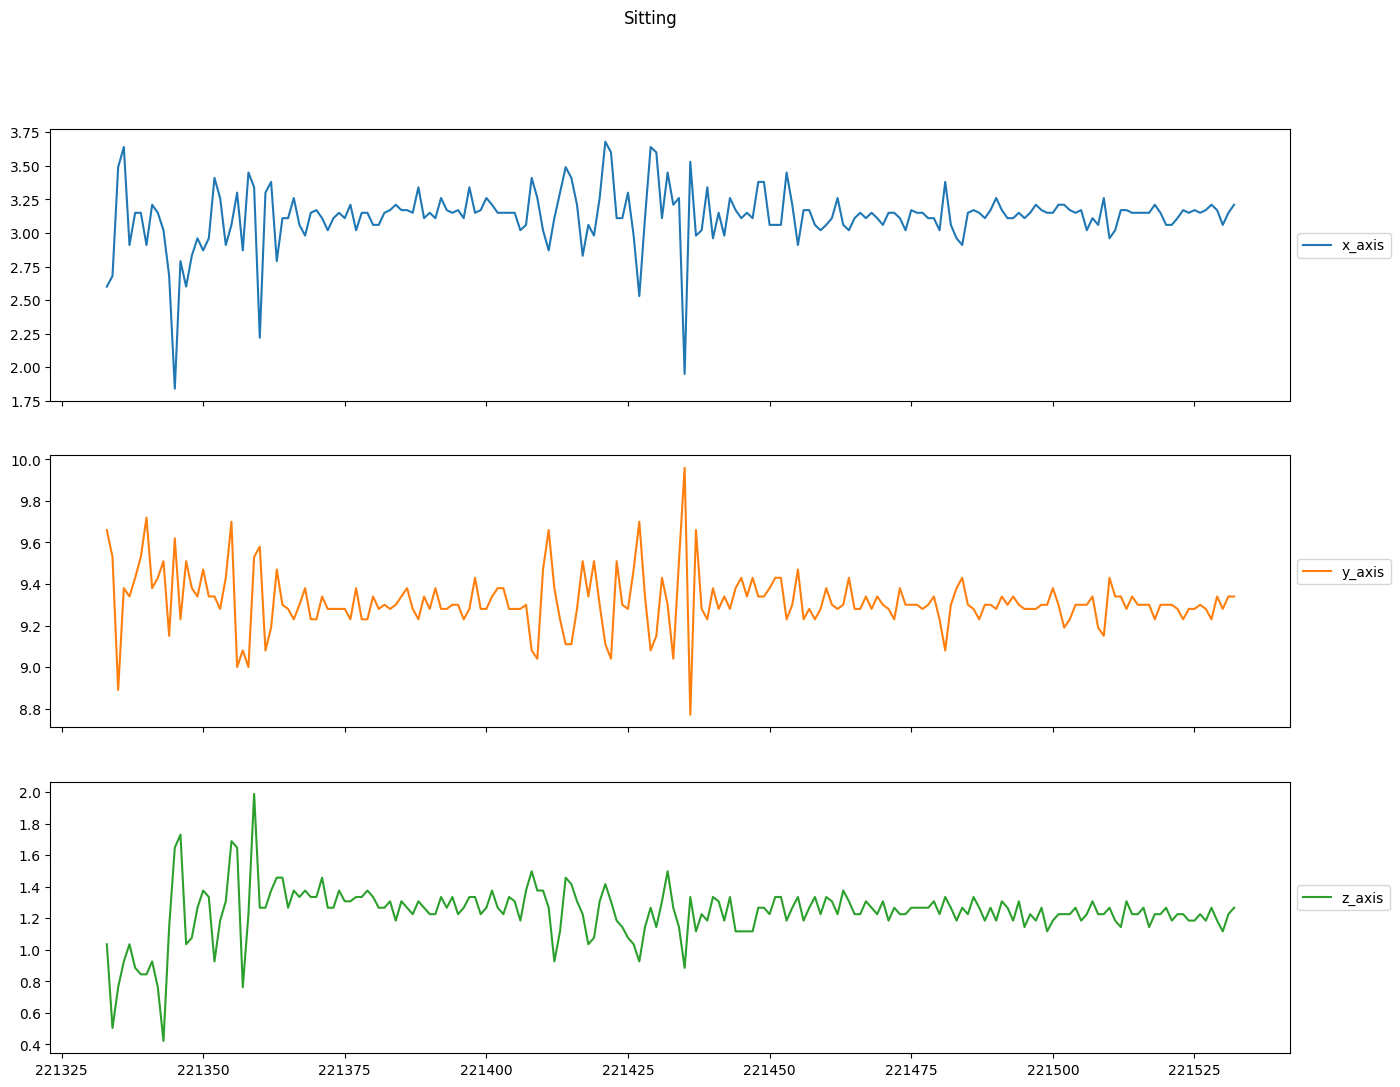

In [157]:
def plot_activity(activity, df):
    data = df[df["activity"] == activity][["x_axis", "y_axis", "z_axis"]][:200]
    axis = data.plot(subplots = True, figsize = (16, 12), title = activity)
    for ax in axis:
        ax.legend(loc = "lower left", bbox_to_anchor = (1.0, 0.5))

plot_activity("Sitting", df)

In [158]:
from sklearn.preprocessing import RobustScaler

scale_columns = ["x_axis", "y_axis", "z_axis"]
scaler = RobustScaler()
scaler = scaler.fit(df[scale_columns])
df.loc[:, scale_columns] = scaler.transform(df[scale_columns].to_numpy())
df

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


,user_id,activity,x_axis,y_axis,z_axis
0,33,Jogging,-0.150932,0.557226,0.101093
1,33,Jogging,0.650602,0.386766,0.191257
2,33,Jogging,0.635298,0.340873,-0.016393
3,33,Jogging,-0.139454,1.257092,0.606557
4,33,Jogging,-0.219799,0.488386,1.445355
...,...,...,...,...,...
1048570,7,Standing,-1.167135,-0.315283,-0.198594
1048571,7,Standing,-1.172753,-0.351384,-0.228684
1048572,7,Standing,-1.172753,-0.340554,-0.276828
1048573,7,Standing,-1.167135,-0.294826,-0.236708


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


,user_id,activity,x_axis,y_axis,z_axis
0,33,Jogging,-0.150932,0.557226,0.101093
1,33,Jogging,0.650602,0.386766,0.191257
2,33,Jogging,0.635298,0.340873,-0.016393
3,33,Jogging,-0.139454,1.257092,0.606557
4,33,Jogging,-0.219799,0.488386,1.445355
...,...,...,...,...,...
1048570,7,Standing,-1.167135,-0.315283,-0.198594
1048571,7,Standing,-1.172753,-0.351384,-0.228684
1048572,7,Standing,-1.172753,-0.340554,-0.276828
1048573,7,Standing,-1.167135,-0.294826,-0.236708


In [159]:
# 필터링할 활동 목록 정의
activities_to_keep = ['Jogging', 'Sitting']

# 'activity' 컬럼이 이 목록에 포함된(isin) 행만 선택
# .copy() -> 나중에 데이터를 수정할 때 오류를 방지
df_filtered = df[df['activity'].isin(activities_to_keep)].copy()

df_filtered

,user_id,activity,x_axis,y_axis,z_axis
0,33,Jogging,-0.150932,0.557226,0.101093
1,33,Jogging,0.650602,0.386766,0.191257
2,33,Jogging,0.635298,0.340873,-0.016393
3,33,Jogging,-0.139454,1.257092,0.606557
4,33,Jogging,-0.219799,0.488386,1.445355
...,...,...,...,...,...
1036605,7,Jogging,0.146067,-1.250301,0.391170
1036606,7,Jogging,-0.165730,-0.941035,0.190570
1036607,7,Jogging,-0.068820,0.127557,-0.186558
1036608,7,Jogging,-0.412921,1.442840,0.016048


,user_id,activity,x_axis,y_axis,z_axis
0,33,Jogging,-0.150932,0.557226,0.101093
1,33,Jogging,0.650602,0.386766,0.191257
2,33,Jogging,0.635298,0.340873,-0.016393
3,33,Jogging,-0.139454,1.257092,0.606557
4,33,Jogging,-0.219799,0.488386,1.445355
...,...,...,...,...,...
1036605,7,Jogging,0.146067,-1.250301,0.391170
1036606,7,Jogging,-0.165730,-0.941035,0.190570
1036607,7,Jogging,-0.068820,0.127557,-0.186558
1036608,7,Jogging,-0.412921,1.442840,0.016048


In [160]:

# 'activity' 문자열을 0 (정상)과 1 (이상)로 변환
df_filtered['Class'] = df_filtered['activity'].map({'Jogging': 0, 'Sitting': 1})

# 모델 훈련에 필요한 데이터만 남김 (센서 값 + Class 라벨)
# user_id와 activity 컬럼 제거

data = df_filtered[['x_axis', 'y_axis', 'z_axis', 'Class']]


print(data.shape)
print(data['Class'].value_counts())

data

(380851, 4)
Class
0    325975
1     54876
Name: count, dtype: int64


,x_axis,y_axis,z_axis,Class
0,-0.150932,0.557226,0.101093,0
1,0.650602,0.386766,0.191257,0
2,0.635298,0.340873,-0.016393,0
3,-0.139454,1.257092,0.606557,0
4,-0.219799,0.488386,1.445355,0
...,...,...,...,...
1036605,0.146067,-1.250301,0.391170,0
1036606,-0.165730,-0.941035,0.190570,0
1036607,-0.068820,0.127557,-0.186558,0
1036608,-0.412921,1.442840,0.016048,0


(380851, 4)
Class
0    325975
1     54876
Name: count, dtype: int64


,x_axis,y_axis,z_axis,Class
0,-0.150932,0.557226,0.101093,0
1,0.650602,0.386766,0.191257,0
2,0.635298,0.340873,-0.016393,0
3,-0.139454,1.257092,0.606557,0
4,-0.219799,0.488386,1.445355,0
...,...,...,...,...
1036605,0.146067,-1.250301,0.391170,0
1036606,-0.165730,-0.941035,0.190570,0
1036607,-0.068820,0.127557,-0.186558,0
1036608,-0.412921,1.442840,0.016048,0


In [161]:
from scipy import stats
import numpy as np
import pandas as pd

# 시계열 윈도우 생성
TIME_STEPS = 100  # 5초 (100개 샘플)
STEP = 50         # 2.5초 겹치기

segments = []
labels = []

# user_id와 Class(0 또는 1)별로 그룹화하여 윈도우 생성
for (user, class_label), group in df_filtered.groupby(['user_id', 'Class']):

    # 훈련에 사용할 센서 값만 추출
    features = group[['x_axis', 'y_axis', 'z_axis']].values

    for i in range(0, len(features) - TIME_STEPS, STEP):
        # 100개(TIME_STEPS)의 (x,y,z) 묶음
        segment = features[i : i + TIME_STEPS]
        segments.append(segment)

        # 이 묶음의 레이블 (어차피 0 아니면 1)
        labels.append(class_label)

# 윈도우 데이터를 2D로 펼치기 (Flatten)
# (N, 100, 3) -> (N, 300)
# N = 생성된 윈도우 개수, 300 = 100 스텝 * 3개 축
segments_array = np.array(segments)
n_windows = segments_array.shape[0]
n_features_flat = segments_array.shape[1] * segments_array.shape[2] # 100 * 3 = 300

X_windows_flat = segments_array.reshape(n_windows, n_features_flat)
y_windows = np.array(labels)


data = pd.DataFrame(X_windows_flat)
data['Class'] = y_windows


RANDOM_SEED = 42
LABELS = ["Normal (Jogging)", "Abnormal (Sitting)"]


print(data.shape)
print(data['Class'].value_counts())

(7535, 301)
Class
0    6471
1    1064
Name: count, dtype: int64
(7535, 301)
Class
0    6471
1    1064
Name: count, dtype: int64


In [162]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(5187, 300)

(5187, 300)

In [163]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [164]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 1.7974 - val_loss: 1.8081
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7545 - val_loss: 1.6957
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6230 - val_loss: 1.5587
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4964 - val_loss: 1.4959
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4679 - val_loss: 1.4733
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4349 - val_loss: 1.4627
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4259 - val_loss: 1.4553
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4245 - val_loss: 1.4487
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4168 - val_loss: 1.4420
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4056 - val_loss: 1.4356
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4106 - val_loss: 1.4287
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4062 - val_l

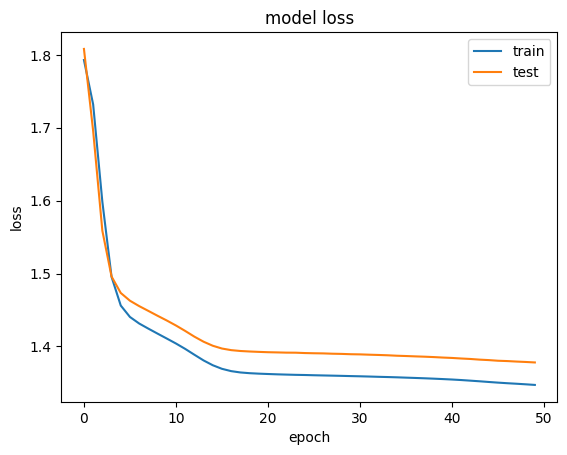

In [165]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [166]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,reconstruction_error,true_class
count,1507.000000,1507.000000
mean,1.301292,0.147976
std,0.539844,0.355194
min,0.012257,0.000000
25%,0.893771,0.000000
50%,1.234369,0.000000
75%,1.566270,0.000000
max,3.707418,1.000000


In [167]:
error_df.head()

,reconstruction_error,true_class
3649,1.410060,0
1600,1.559628,1
6742,1.108583,0
1467,1.680619,0
4053,1.132513,1


In [168]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 1.5

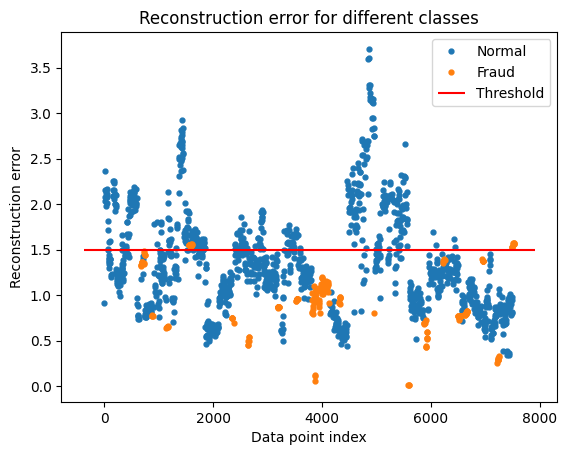

In [169]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

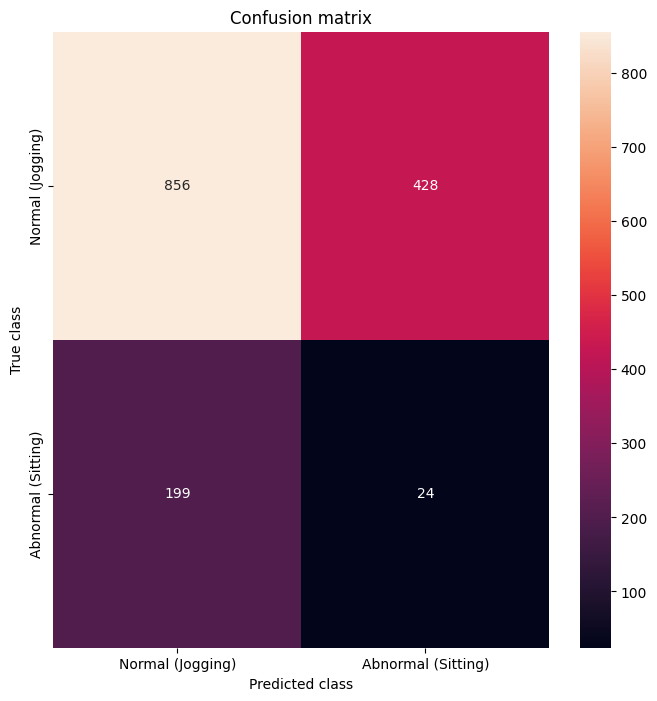

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1284
           1       0.05      0.11      0.07       223

    accuracy                           0.58      1507
   macro avg       0.43      0.39      0.40      1507
weighted avg       0.70      0.58      0.63      1507



In [170]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))